In [14]:
from ciphers import transposition_cipher, vigenere_cipher, caesar_cipher
import matplotlib.pyplot as plt
from Avalanche_effect import initial_avalanche_effect, repeated_avalanche_effect, repeated_avalanche_effect_all_ascii, repeated_avalanche_effect_CBC, repeated_avalanche_effect_caesar
from Cbc import encrypt_cbc, decrypt_cbc

In [15]:
plaintext = "Marco Bologna Security and Vulnerability in Networks"
transposition_key = "45312" 
vigenere_key = "KEY"
caesar_key = 2

# Caesar Cypher and Transposition Cypher

In [16]:
substituted_text = caesar_cipher(plaintext, caesar_key)
final_ciphertext = transposition_cipher(substituted_text, transposition_key)
print(f"Substitution first: {final_ciphertext}")

transposed_text = transposition_cipher(plaintext, transposition_key)
final_ciphertext = caesar_cipher(transposed_text, caesar_key)
print(f"Transposition first: {final_ciphertext}")

Substitution first: eqgvxtkptxqieawcvgmxtnukfgnpqxodpwcndavucqctppkkyx
Transposition first: eqgvxtkptzqieawcvgmztnukfgnpqzodpwcndavucqctppkkyz


The only difference between the 2 modalities are the carachters added at the end of the text (by the transposition cypher), in the first case theese characters remains the same, in the second case they are changed by the caesar cypher.
In Any case, theese characters are not part of the original text, so there is no difference in the final result.

differing bits: 1
differing chars: 1
eqgvxtkptzqieawcvgmztnukfgnpqzodpwcndavucqctppkkyz
eqgvxtkptzqieawcvgmztnukfgnpqzndpwcndavucqctppkkyz
differing bits: 1
differing chars: 1
xvcomsyxvazbybhbewrbirgiwrrcemgvseviqpersmkxppffsm
xvcomsyxvazbybhbewrbirgiwrrcemgvsevippersmkxppffsm
differing bits: 1
differing chars: 1
qxdtkgggzuocjdyoxtroezayieurmhzubdktikurxadgttxsoh
qxdtkgggzuocjdyoxtroezayieurmhzubdktikurxadgttxroh
differing bits: 1
differing chars: 1
vbftaofwiqmwaqkjmtvjfilvctdmfusiqqggbvzvziezbwwkcz
vbftaofwiqmwaqkjmtvjfilvctdmftsiqqggbvzvziezbwwkcz
differing bits: 1
differing chars: 1
vksxxhsbbecsmlewixdbhycvnosxgmxqolhvuibydhyokfkdky
vksxxhsbbecsmlevixdbhycvnosxgmxqolhvuibydhyokfkdky
differing bits: 1
differing chars: 1
zdnfxindqmzggdpojamaudozezqkafxjeyjqzxfhmuukauswjm
zdnfxindqmzggdpojamaudozezqkafxjexjqzxfhmuukauswjm
differing bits: 4
differing chars: 1
hsfobcahmlzorcghljcopficqmgzwybkbqwbzsowfpilfslbwu
hsfobczhmlzorcghljcopficqmgzwybkbqwbzsowfpilfslbwu
differing bits: 1
differing

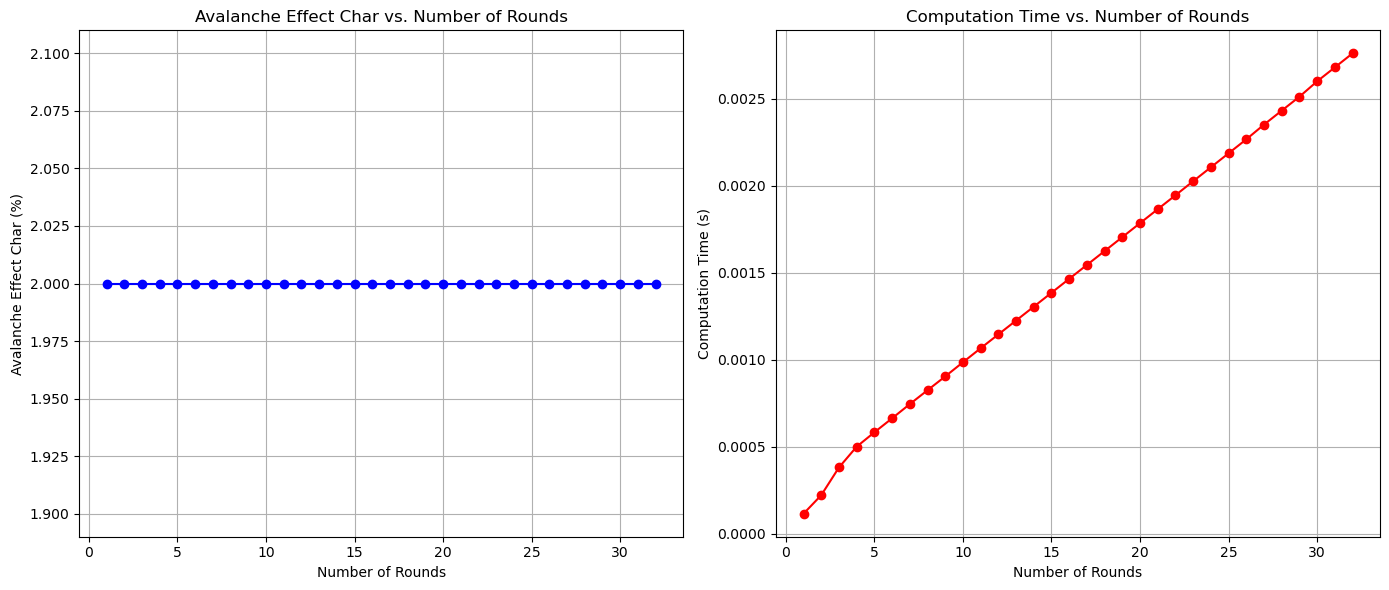

In [17]:
rounds = 32
avalanche_effects_char,avalanche_effects_bit, computation_times = repeated_avalanche_effect_caesar(plaintext, transposition_key, caesar_key, rounds)
for round_num, (effect_char,effect_bit, time_taken) in enumerate(zip(avalanche_effects_char,avalanche_effects_bit, computation_times), start=1):
    print(f"Round {round_num}: diff_char_percentage = {effect_char:.2f}%, diff_bit_percentage = {effect_bit:.2f}%, Computation Time = {time_taken:.6f} seconds")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, rounds + 1), avalanche_effects_char, marker='o', color='b')
plt.title('Avalanche Effect Char vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Avalanche Effect Char (%)')
plt.grid(True)

'''plt.subplot(1, 3, 2)
plt.plot(range(1, rounds + 1), avalanche_effects_bit, marker='o', color='b')
plt.title('Avalanche Effect Bit vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Avalanche Effect Bit (%)')
plt.grid(True)'''

plt.subplot(1, 2, 2)
plt.plot(range(1, rounds + 1), computation_times, marker='o', color='r')
plt.title('Computation Time vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Computation Time (s)')
plt.grid(True)


plt.tight_layout()
plt.show()

# Vigenere Cypher and Transposition Cypher

In [18]:
substituted_text = vigenere_cipher(plaintext, vigenere_key)
final_ciphertext = transposition_cipher(substituted_text, transposition_key)
print(f"Substitution first: {final_ciphertext}")

transposed_text = transposition_cipher(plaintext, transposition_key)
final_ciphertext = vigenere_cipher(transposed_text, vigenere_key)
print(f"Transposition first: {final_ciphertext}")

Substitution first: oprnvcjlkxoucphnbmgxpzykbylgsxwsymiofjggeqovgizqjx
Transposition first: mscvjvbiifbxzmacrykqvvpzowtqsizpkgbyvyetyhsrbnzvjf


In [19]:
original_ciphertext, modified_ciphertext, diff_char_percentage,diff_bit_percentage = initial_avalanche_effect(plaintext, transposition_key,
                                                                                     vigenere_key)
print(f"Original Ciphertext: {original_ciphertext}")
print(f"Modified Ciphertext: {modified_ciphertext}")
print(f"Percentage of Differing Characters: {diff_char_percentage:.2f}%")
print(f"Percentage of Differing Bits: {diff_bit_percentage:.2f}%")

differing chars: 2
oprnvcjlkxoucphnbmgxpzykbylgsxwsymiofjggeqovgizqjx
nprnvcjlkxoucphnbmgxpzykbylgsxvsymiofjggeqovgizqjx
differing bits: 2
Original Ciphertext: oprnvcjlkxoucphnbmgxpzykbylgsxwsymiofjggeqovgizqjx
Modified Ciphertext: nprnvcjlkxoucphnbmgxpzykbylgsxvsymiofjggeqovgizqjx
Percentage of Differing Characters: 4.00%
Percentage of Differing Bits: 0.50%


2 letters changed, one is due to the flipped bit in the plaintext, the oter is due to the flipped bit in the autokey of vigenere.

In [20]:
rounds = 32
avalanche_effects_char,avalanche_effects_bit, computation_times = repeated_avalanche_effect(plaintext, transposition_key, vigenere_key, rounds)
for round_num, (effect_char,effect_bit, time_taken) in enumerate(zip(avalanche_effects_char,avalanche_effects_bit, computation_times), start=1):
    print(f"Round {round_num}: diff_char_percentage = {effect_char:.2f}%, diff_bit_percentage = {effect_bit:.2f}%, Computation Time = {time_taken:.6f} seconds")


differing chars: 2
oprnvcjlkxoucphnbmgxpzykbylgsxwsymiofjggeqovgizqjx
nprnvcjlkxoucphnbmgxpzykbylgsxvsymiofjggeqovgizqjx
differing bits: 2
differing chars: 4
bmdtzqiuzrkgbyaialwwpgztvhvruwytzpbwcmnwtweqfvkrwu
amdtzqhuzrkgbyaialwwpgztvhvruwxtzpbwbmnwtweqfvkrwu
differing bits: 5
differing chars: 8
upieibnjjrlzgwbruybebtslvmvnawltejagpvfzqbfyconrja
tpieibmjjrlygwbruxbebtslvmvnawktejagovfzqafyconqja
differing bits: 18
differing chars: 15
ykhsmmuloxxeayortodngrxzwiavetejuxzeyklttriqugtygl
xkhsmmtloxxdzyortncngrxywiavesdjuxyexklttqhqugtxfl
differing bits: 25
differing chars: 28
qavufmbpjmwrsgntirlefxxckrnjbsitirufzydoomsruznvcj
pavtemapjlwqrgnshqkefxwbkrmiarhtiqtfyydnolrrtynubj
differing bits: 46
differing chars: 37
kvcehszifbfnemhfnngwtueebtasgpahllwornmrevaoipuqpe
ivccgrxifzeldlhdmlewttcdaszrenzhljvnpnmpetznhntooe
differing bits: 71
differing chars: 47
oxrlxzlasecaujvpdidyapfuatajryuunjgxszrpzdszaenchi
kwphwwizrbbwsitmceaxaocsyryiovstmgeuqyrmzzqxxclyfg
differing bits: 110
differing chars: 

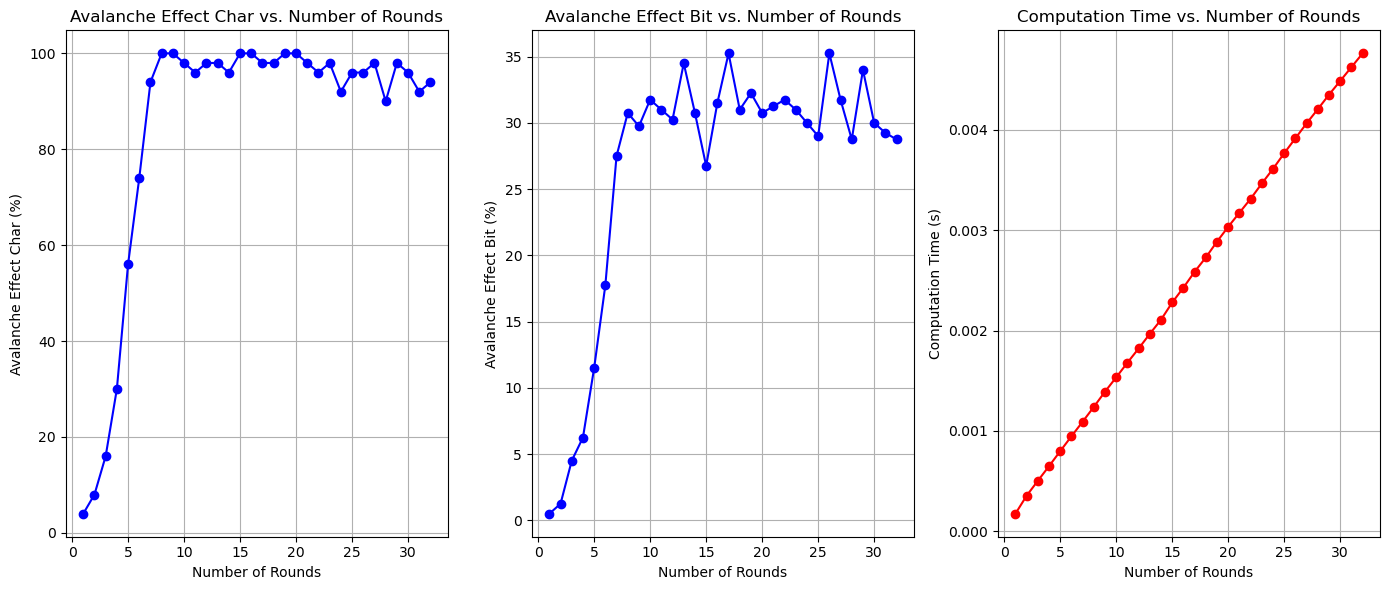

In [21]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.plot(range(1, rounds + 1), avalanche_effects_char, marker='o', color='b')
plt.title('Avalanche Effect Char vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Avalanche Effect Char (%)')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, rounds + 1), avalanche_effects_bit, marker='o', color='b')
plt.title('Avalanche Effect Bit vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Avalanche Effect Bit (%)')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(range(1, rounds + 1), computation_times, marker='o', color='r')
plt.title('Computation Time vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Computation Time (s)')
plt.grid(True)

plt.tight_layout()
plt.show()


differing bits: 3
differing chars: 2
®±yÕÍÓÕÐìÞËØÝ¿ËçºÔñÀáÙç·çÄéá»ß²ËÓÝÓÔ§ÙÄ»ÈåÙß
®±yÕÍÓÕÐìÞËØÝ¿ËçºÔñÀáÙç·çÄéáºß±ËÓÝÓÔ§ÙÄ»ÈåÙß
differing bits: 6
differing chars: 4
 Ú$¼v²¢¬»v¤¡±©aQ¬
%²úc½D¬T¥YuiÓ¡³Äk§zWpÄ¨£Â
 Ú$¼v²¡¬»u¤¡±©aQ¬
%²úc½D¬T¥YuiÓ¡³Äk§zWpÄ¨¢Â
differing bits: 17
differing chars: 7
 
h]-6SE:I3Ûc^âw8²Ê"u¦ nc |"·É×è3÷I;T6=Yü.
 
h]-6SE9I2Ûc^âw7²Ê!u¦ nc |"·É×è3÷I;S6=Yü-
differing bits: 19
differing chars: 13
³¢Æ·é²ßä;| gãUðXalhmèZß$·0î:Ô
3.½I#ÛeÃhÖ
³¢Æ·é²Þä;| fãTðX`lfmèYß$·0î9Ô
2.½H#ÛdÃh Ö
differing bits: 33
differing chars: 18
G#[9<u¦Ió4kvqÏQFmVÆ2£{J#÷Ú;
D#[8<u¦Iñ4ktqÎQFlVÆ1£{I#÷Ú9
differing bits: 38
differing chars: 19
fá/¶
jÆ+Mºçxµ*1µÆ]²7ùK`ì~Ö×X¶½Üì¨tY#Sä®µ
eá/²
xµ(1µÃ{]²3ùK]ì}Ö×U¶¸Üì¥tY#Qä®²
differing bits: 55
differing chars: 19
Ï@à#à¨4,²ÈBe<aùrEéoäañ»Qß_cu¿o9òk½üáY0ÿd`«
ýÏ@Ú#à¥4,®ÈBe3aùjEéjäaë»QØ_
cr¿j9ík

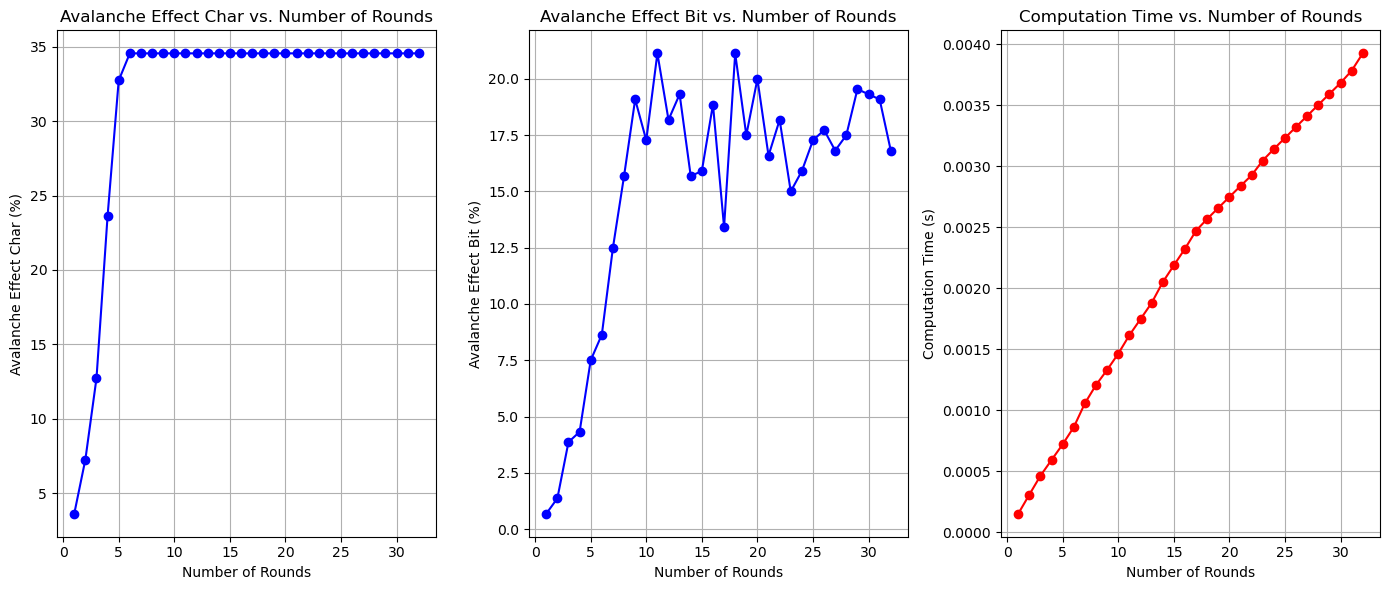

In [22]:
rounds = 32
avalanche_effects_char,avalanche_effects_bit, computation_times = repeated_avalanche_effect_all_ascii(plaintext, transposition_key, vigenere_key, rounds)

for round_num, (effect_char,effect_bit, time_taken) in enumerate(zip(avalanche_effects_char,avalanche_effects_bit, computation_times), start=1):
    print(f"Round {round_num}: diff_char_percentage = {effect_char:.2f}%, diff_bit_percentage = {effect_bit:.2f}%, Computation Time = {time_taken:.6f} seconds")

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.plot(range(1, rounds + 1), avalanche_effects_char, marker='o', color='b')
plt.title('Avalanche Effect Char vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Avalanche Effect Char (%)')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, rounds + 1), avalanche_effects_bit, marker='o', color='b')
plt.title('Avalanche Effect Bit vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Avalanche Effect Bit (%)')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(range(1, rounds + 1), computation_times, marker='o', color='r')
plt.title('Computation Time vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Computation Time (s)')
plt.grid(True)


plt.tight_layout()
plt.show()

The graph shows a strange behaviour, the avalanche effect rise till around 35% and then remains constant, this is due to the key used for the transposition cipher that in this case is a symmetric key (45312), so the avalanche effect is limited by the key itself beacuse ciphering 2 times with this key is the same as ciphering and then deciphering.
Let's try with a different key.

differing bits: 3
differing chars: 2
º´¬ØÝ¿ËçºÔñ±ÞÕÍÓÕÐìÞÙç·çÄéá»ß²ËÓÝÓÔ§ÙÄ»ÈåÙß
º´¬ØÝ¿ËçºÔñ±ÞÕÍÓÕÐìÞÙç·çÄéáºß±ËÓÝÓÔ§ÙÄ»ÈåÙß
differing bits: 10
differing chars: 4
(.r­^,¬
%²YHw­©»v¤¢·y´&¥zØ¯Äk§ryI·@~Â
(.r­^,¬
%²YHw­©»u¤¢·y´&¥zØ¯Äk§ryI·@~Â
differing bits: 18
differing chars: 7
øjhÜÓ>H·Ã(J¬+6z[DÕc
¾,Ý­ f¢§ÅÀÔ1"ð.üøÈ×ÐÒ$+=%
¬+6z[DÕc'J
½,Ý¬ f¢§ÅÀÓ1"ï.üøÈ×ÐÒ$+=$
differing bits: 11
differing chars: 10
¥cOþh<'Ø©Ù:ôke¤æ¬	®éZÜ'Ø/ZZ=ë
¤cOþh<'Ø¨Ù:ôkd¤ä¬	¬éYÜ'Ø/ZZ=ë
differing bits: 30
differing chars: 18
¾;ráËïþÁÌ#]Æ*°Å¦qÅ¿¡AóÈEµöÞÁÃQMõóËaþ
¾;qáËï	üÁÌ!]Æ*°Å¥qÅ¿ AóÇEµõÞÁÁQMóóÉaþ
differing bits: 55
differing chars: 28
,ß$¢`à¹&ñPp<Ãä1egÃq¶ùêe4XÍNbW´mI£îÉ3»±dog4
,ß$¢`à¹&ñNm9Áã0egÃq¶ùêe2VÍK`V´lH£íÇ0º®bof4
differing bits: 114
differing chars: 43
«QÉtsZbp	è(áP)T} ºì·çêY!ÆÏ©`3ö´lx0SLn4dôpëººk
«QÆrsW]oè'àN(S}ý~·é´åéYÅÏ§`1ö´jv/RKm0c

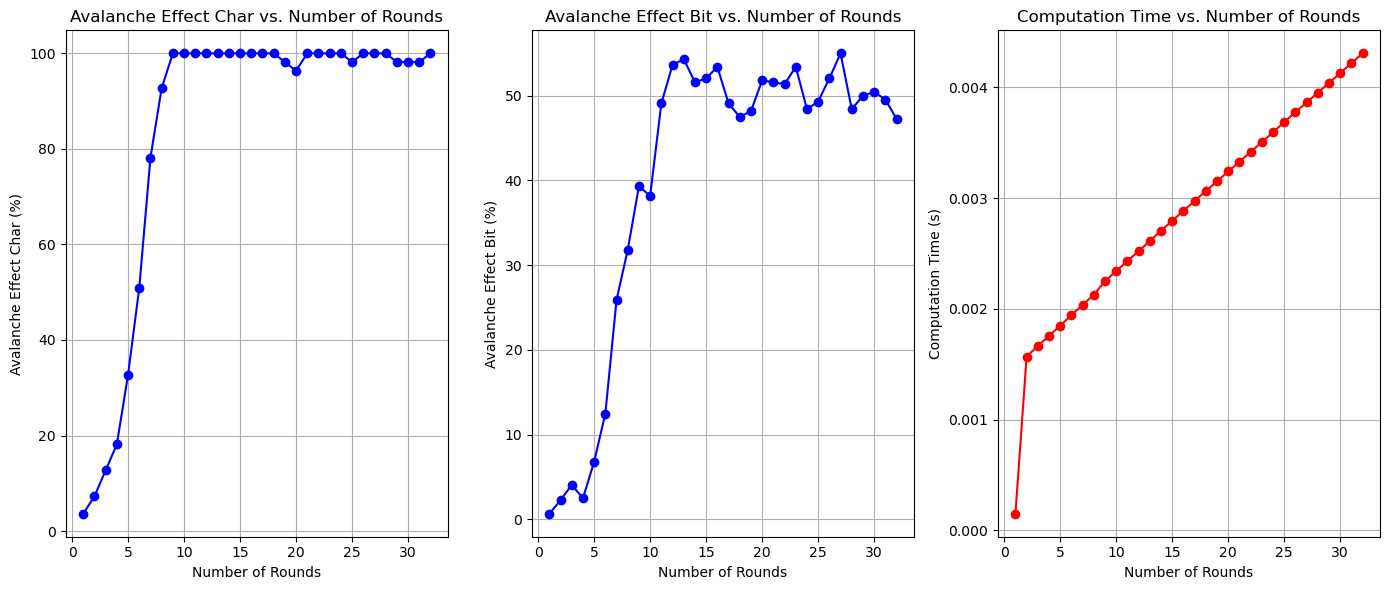

In [23]:
transposition_key="45321"
rounds = 32
avalanche_effects_char,avalanche_effects_bit, computation_times = repeated_avalanche_effect_all_ascii(plaintext, transposition_key, vigenere_key, rounds)

for round_num, (effect_char,effect_bit, time_taken) in enumerate(zip(avalanche_effects_char,avalanche_effects_bit, computation_times), start=1):
    print(f"Round {round_num}: diff_char_percentage = {effect_char:.2f}%, diff_bit_percentage = {effect_bit:.2f}%, Computation Time = {time_taken:.6f} seconds")

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.plot(range(1, rounds + 1), avalanche_effects_char, marker='o', color='b')
plt.title('Avalanche Effect Char vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Avalanche Effect Char (%)')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, rounds + 1), avalanche_effects_bit, marker='o', color='b')
plt.title('Avalanche Effect Bit vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Avalanche Effect Bit (%)')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(range(1, rounds + 1), computation_times, marker='o', color='r')
plt.title('Computation Time vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Computation Time (s)')
plt.grid(True)


plt.tight_layout()
plt.show()

differing bits: 12
differing chars: 12
º´¼ÛáÒ¹Ð$Å+G`T3E«ý§ðÐüÑ0Å+L:k2©¢¼¬­äØÒÂÇÅÖìíoA
º´¼ÛáÒ¸Ð$Å+GaT3D«ý§ðÐüÐ0Å+L:j2
©¢¼¬­åØÒÂÇÅÖìínA
differing bits: 31
differing chars: 15
,Ô4±KmFsZ^CïAÝ(÷¨HLÒDíSÑ?2Áä&sJÈü~L]{	Çÿ¥QaCä^ÉVö
,Ó4±JmFrZZCïCÝ(÷¨OLÒDíSÒ? 2Ãä&sHÈã~L]{	Æÿ¹QaCä^ÉVö
differing bits: 80
differing chars: 29
¸
§?r¡b¶BøNðÃFç{w$·mJl¨ 3¹Q¯ÉåôhYê-!*s¢Þ=lp
·
¦?r¡a¶BûNðÃ½Lç¤{w$mBl¢3¹Q¦É0æôhYÍ-(!s©¡Þ=lOp
differing bits: 125
differing chars: 42
òûê	À2øI=»dÙÜN$WI¨S7ÂO#°~ÆP°+ÖÕÔç¥¬GêÀð6*Bô:
ñûéÀ1öIX=½^.ÙÐ@¢WGãÖ[=Â«#¤6´ °"$Õ-E¥Ç®à Ô682ôJË
differing bits: 168
differing chars: 48
MbòRKDêE
8O½sXRçpÇî÷ÏDá.q'
0T©-¯\¹ÏËº(ÕdßÚ¸%2
L`ðPIDçE×9geVR£ç½,,¢NÃÑDXÜûéá2c©«¡g9(áÑË2(»çÒàË2 
differing bits: 183
differing chars: 54
 XÁImth÷úDý¥Ø~îÐÃ¥¼3óøj0"IDªêmÔÑ]£l¶Ld
;,q4G2O°fT¿Ä+¿=eØþR®YóôTf9úÞ>ÔImïâN:Úí9 eÿ+zÞAIúìU
differing bits: 211
differing chars: 60
chEÅ3?8 ¥7K

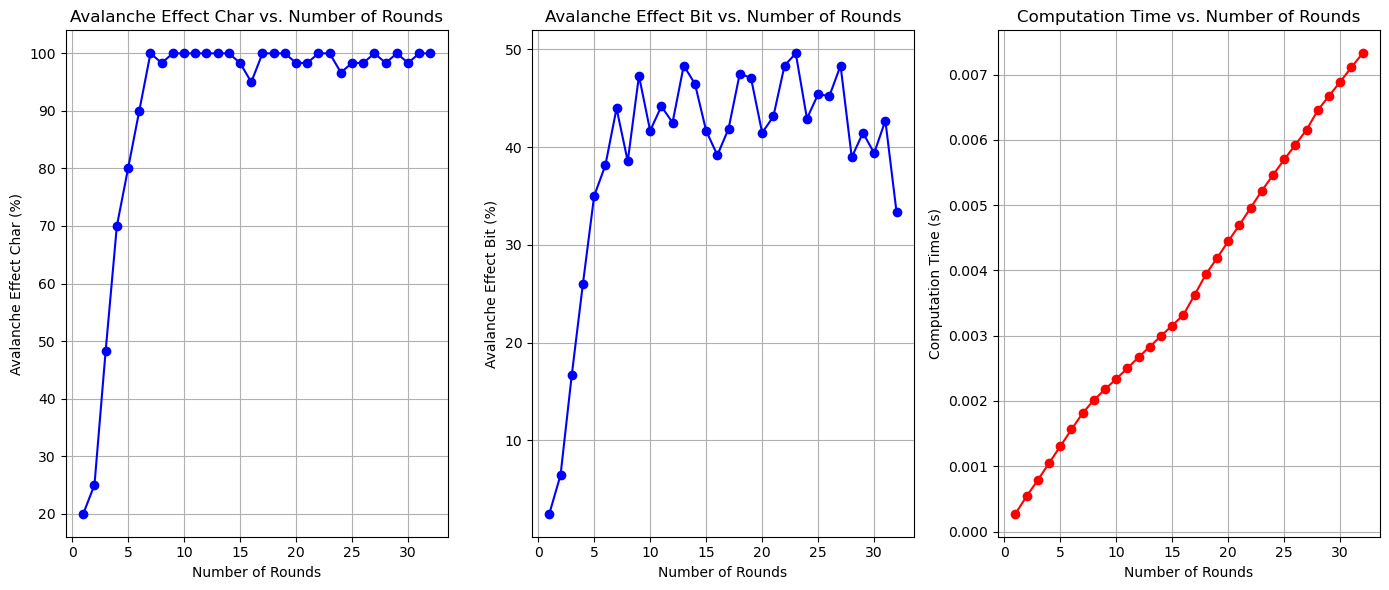

In [24]:
rounds = 32
avalanche_effects_char,avalanche_effects_bit, computation_times = repeated_avalanche_effect_CBC(plaintext, transposition_key, vigenere_key, rounds)
for round_num, (effect_char,effect_bit, time_taken) in enumerate(zip(avalanche_effects_char,avalanche_effects_bit, computation_times), start=1):
    print(f"Round {round_num}: diff_char_percentage = {effect_char:.2f}%, diff_bit_percentage = {effect_bit:.2f}%, Computation Time = {time_taken:.6f} seconds")

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.plot(range(1, rounds + 1), avalanche_effects_char, marker='o', color='b')
plt.title('Avalanche Effect Char vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Avalanche Effect Char (%)')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, rounds + 1), avalanche_effects_bit, marker='o', color='b')
plt.title('Avalanche Effect Bit vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Avalanche Effect Bit (%)')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(range(1, rounds + 1), computation_times, marker='o', color='r')
plt.title('Computation Time vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Computation Time (s)')
plt.grid(True)


plt.tight_layout()
plt.show()

In [25]:
print(f"Plaintext: {plaintext}")

encrypted_message = encrypt_cbc(plaintext, transposition_key, vigenere_key)
print(f"Cyphertext: {encrypted_message}")

decrypted_message = decrypt_cbc(encrypted_message, transposition_key, vigenere_key)
print(f"Decrypted text: {decrypted_message}")

Plaintext: Marco Bologna Security and Vulnerability in Networks
Cyphertext: º´¼ÛáÒ¹Ð$Å+G`T3E«ý§ðÐüÑ0Å+L:k2©¢¼¬­äØÒÂÇÅÖìíoA
Decrypted text: Marco Bologna Security and Vulnerability in Networks


In [26]:
current_text = plaintext
print(f"Plaintext: {plaintext}")
for i in range(16):
    encrypted_text = encrypt_cbc(current_text, transposition_key, vigenere_key)

    current_text = encrypted_text

print(f"Cyphertext: {encrypted_text}")

for i in range(16):
    decrypted_text = decrypt_cbc(encrypted_text, transposition_key, vigenere_key)
    encrypted_text = decrypted_text

print(f"Decrypted text: {decrypted_text}")

Plaintext: Marco Bologna Security and Vulnerability in Networks
y"s÷TRÌ¦ñ!¡±»fÇÔN´î>3.Ë*=4Édñæ?¿È²³øÛ¬·
ÆÐt¾
Decrypted text: Marco Bologna Security and Vulnerability in Networks
